# Importing Packages

In [328]:
! pip install geopandas

In [332]:
import param
import panel as pn

def pn_repr(self, include=None, exclude=None):
    pn.extension()
    return pn.viewable.Viewable._repr_mimebundle_(self, include, exclude)
pn.layout.Panel._repr_mimebundle_ = pn_repr

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import geopandas as gpd

# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)

pn.extension(comms='colab')

# Importing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/NYC Property Sales/df_2016_20.csv', index_col=0, low_memory=False)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009.0,3.0,0.0,3.0,2059.0,3696.0,1900.0,1.0,C0,7738700.0,2016-12-22
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,2.0,,C7,21 AVENUE B,,10009.0,12.0,4.0,16.0,4186.0,10588.0,1900.0,2.0,C7,0.0,2016-03-10
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389.0,53.0,,C1,615 EAST 6TH STREET,,10009.0,10.0,0.0,10.0,2271.0,7860.0,1939.0,2.0,C1,6350000.0,2016-04-20
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414857 entries, 0 to 7559
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         414852 non-null  float64
 1   NEIGHBORHOOD                    414852 non-null  object 
 2   BUILDING CLASS CATEGORY         414852 non-null  object 
 3   TAX CLASS AT PRESENT            414568 non-null  object 
 4   BLOCK                           414852 non-null  float64
 5   LOT                             414852 non-null  float64
 6   EASE-MENT                       178466 non-null  object 
 7   BUILDING CLASS AT PRESENT       414568 non-null  object 
 8   ADDRESS                         414852 non-null  object 
 9   APARTMENT NUMBER                230293 non-null  object 
 10  ZIP CODE                        414825 non-null  float64
 11  RESIDENTIAL UNITS               384751 non-null  float64
 12  COMMERCIAL UNITS  

In [ ]:
df.columns=['boro', 'NTA', 'bldg_cl_cat', 'tax_cl_pres', 'block', 'lot', 'easement', 'bldg_cl_pres', 'address', 'apt_no', 'zip', 'res_un', 'com_un', 'total_un', 'land_sf', 'gross_sf', 'yr_blt', 'tax_cl_TOS', 'bldg_cl_TOS', 'sale_price', 'sale_date']
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009.0,3.0,0.0,3.0,2059.0,3696.0,1900.0,1.0,C0,7738700.0,2016-12-22
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,2.0,,C7,21 AVENUE B,,10009.0,12.0,4.0,16.0,4186.0,10588.0,1900.0,2.0,C7,0.0,2016-03-10
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389.0,53.0,,C1,615 EAST 6TH STREET,,10009.0,10.0,0.0,10.0,2271.0,7860.0,1939.0,2.0,C1,6350000.0,2016-04-20
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09


# Sale Date

In [ ]:
df.sale_date.isna().sum()

5

In [ ]:
df.sale_date = df.sale_date.astype(str)
df.sale_date = pd.to_datetime(df.sale_date, errors='coerce')
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009.0,3.0,0.0,3.0,2059.0,3696.0,1900.0,1.0,C0,7738700.0,2016-12-22
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,2.0,,C7,21 AVENUE B,,10009.0,12.0,4.0,16.0,4186.0,10588.0,1900.0,2.0,C7,0.0,2016-03-10
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389.0,53.0,,C1,615 EAST 6TH STREET,,10009.0,10.0,0.0,10.0,2271.0,7860.0,1939.0,2.0,C1,6350000.0,2016-04-20
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2.0,C7,0.0,2016-12-14
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2.0,C7,0.0,2016-12-09


# Year Built

In [ ]:
df.yr_blt.isna().sum()

10879

In [ ]:
df.yr_blt = df.yr_blt.astype(str)
df.yr_blt = df.yr_blt.replace({'nan': '0'})
df.yr_blt = df.yr_blt.apply(lambda x: int(float(x)))
df.yr_blt = pd.to_datetime(df.yr_blt, format='%Y', errors='coerce')
df.head()


,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009.0,3.0,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,2.0,,C7,21 AVENUE B,,10009.0,12.0,4.0,16.0,4186.0,10588.0,1900-01-01,2.0,C7,0.0,2016-03-10
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389.0,53.0,,C1,615 EAST 6TH STREET,,10009.0,10.0,0.0,10.0,2271.0,7860.0,1939-01-01,2.0,C1,6350000.0,2016-04-20
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900-01-01,2.0,C7,0.0,2016-12-14
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900-01-01,2.0,C7,0.0,2016-12-09


# Zip Code

In [ ]:
df.zip.isna().sum()

32

In [ ]:
df.zip = df.zip.replace({np.nan: 0})
df.zip = df.zip.apply(lambda x: int(x))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009,3.0,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385.0,2.0,,C7,21 AVENUE B,,10009,12.0,4.0,16.0,4186.0,10588.0,1900-01-01,2.0,C7,0.0,2016-03-10
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389.0,53.0,,C1,615 EAST 6TH STREET,,10009,10.0,0.0,10.0,2271.0,7860.0,1939-01-01,2.0,C1,6350000.0,2016-04-20
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009,28.0,3.0,31.0,4616.0,18690.0,1900-01-01,2.0,C7,0.0,2016-12-14
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009,16.0,1.0,17.0,2212.0,7803.0,1900-01-01,2.0,C7,0.0,2016-12-09


# Building Class

In [ ]:
bldg_class = pd.read_excel('/content/drive/MyDrive/Datasets/NYC Property Sales/keys/building_code_nyc.xlsx')
bldg_class

,Building Code,Description
0,A0,CAPE COD
1,A1,TWO STORIES - DETACHED SM OR MID
2,A2,ONE STORY - PERMANENT LIVING QUARTER
3,A3,LARGE SUBURBAN RESIDENCE
4,A4,CITY RESIDENCE ONE FAMILY
...,...,...
213,Z4,FOREIGN GOVERNMENT
214,Z5,UNITED NATIONS
215,Z7,EASEMENT
216,Z8,CEMETERY


In [ ]:
list(set(df.bldg_cl_pres.values))

[nan,
 'RP',
 'L3',
 'F9',
 'P4',
 'K6',
 'A4',
 'D2',
 'N9',
 'Z1',
 'H4',
 'J6',
 'O8',
 ' ',
 'C1',
 'J9',
 'C8',
 'T9',
 'D9',
 'HS',
 'RK',
 'D5',
 'C6',
 'R9',
 'J4',
 'G2',
 'Z2',
 'V0',
 'B3',
 'Q1',
 'Z3',
 'L9',
 'RW',
 'K3',
 'F8',
 'G0',
 'Z9',
 'R8',
 'HR',
 'H8',
 'G4',
 'J2',
 'R3',
 'O9',
 'M2',
 'M1',
 'H5',
 'C5',
 'I4',
 'R7',
 'RS',
 'K5',
 'V7',
 'O7',
 'R1',
 'W1',
 'HH',
 'A1',
 'K8',
 'V3',
 'A5',
 '  ',
 'HB',
 'G3',
 'S5',
 'R5',
 'H3',
 'I6',
 'P6',
 'H7',
 'RB',
 'P2',
 'Z7',
 'L1',
 'Q2',
 'V6',
 'G8',
 'V5',
 'B9',
 'G6',
 'A3',
 'F5',
 'RA',
 'C4',
 'G7',
 'L2',
 'M4',
 'A9',
 'D0',
 'D6',
 'J3',
 'S9',
 'O3',
 'W6',
 'A6',
 'O4',
 'S2',
 'M9',
 'D7',
 'H2',
 'S0',
 'S3',
 'RT',
 'W4',
 'RR',
 'F4',
 'K9',
 'A8',
 'W2',
 'P3',
 'P7',
 'K7',
 'O6',
 'RG',
 'H9',
 'I9',
 'S4',
 'V2',
 'CM',
 'J8',
 'P5',
 'O1',
 'O2',
 'J5',
 'P1',
 'I7',
 'R0',
 'Z4',
 'E2',
 'Y3',
 'E1',
 'V9',
 'Q8',
 'D3',
 'K2',
 'A2',
 'G5',
 'GU',
 'W7',
 'B2',
 'W9',
 'F1',
 'C2',
 

In [ ]:
df.bldg_cl_pres.isna().sum()

289

In [ ]:
# replace ' ', '  ', and nan
df.bldg_cl_pres = df.bldg_cl_pres.replace({' ': '', '  ': '', np.nan: ''})

In [ ]:
df.bldg_cl_pres.value_counts()

D4    61222
R4    57208
A1    34989
A5    29020
B2    24607
      ...  
N4        1
Z1        1
U7        1
P4        1
CM        1
Name: bldg_cl_pres, Length: 191, dtype: int64

In [ ]:
list(set(df.bldg_cl_TOS.values))

[nan,
 'RP',
 'L3',
 'F9',
 'P4',
 'K6',
 'A4',
 'D2',
 'N9',
 'Z1',
 'H4',
 'J6',
 'O8',
 'C1',
 'J9',
 'C8',
 'T9',
 'D9',
 'HS',
 'RK',
 'D5',
 'C6',
 'R9',
 'J4',
 'G2',
 'Z2',
 'V0',
 'B3',
 'Q1',
 'Z3',
 'L9',
 'RW',
 'K3',
 'F8',
 'G0',
 'Z9',
 'R8',
 'HR',
 'H8',
 'G4',
 'J2',
 'R3',
 'O9',
 'M2',
 'M1',
 'H5',
 'C5',
 'I4',
 'R7',
 'RS',
 'K5',
 'V7',
 'O7',
 'R1',
 'T1',
 'W1',
 'HH',
 'A1',
 'K8',
 'V3',
 'A5',
 'HB',
 'G3',
 'S5',
 'R5',
 'H3',
 'I6',
 'P6',
 'H7',
 'RB',
 'P2',
 'Z7',
 'L1',
 'Q2',
 'V6',
 'G8',
 'V5',
 'B9',
 'G6',
 'A3',
 'F5',
 'RA',
 'C4',
 'G7',
 'L2',
 'M4',
 'A9',
 'D0',
 'D6',
 'J3',
 'S9',
 'O3',
 'W6',
 'A6',
 'O4',
 'S2',
 'M9',
 'D7',
 'H2',
 'S0',
 'S3',
 'RT',
 'W4',
 'RR',
 'F4',
 'K9',
 'A8',
 'W2',
 'P3',
 'P7',
 'K7',
 'O6',
 'RG',
 'H9',
 'I9',
 'S4',
 'V2',
 'CM',
 'J8',
 'P5',
 'O1',
 'O2',
 'J5',
 'P1',
 'I7',
 'R0',
 'Z4',
 'E2',
 'Y3',
 'E1',
 'V9',
 'Q8',
 'D3',
 'K2',
 'A2',
 'G5',
 'GU',
 'W7',
 'B2',
 'W9',
 'F1',
 'C2',
 'G9',


In [ ]:
df.bldg_cl_TOS.isna().sum()

5

In [ ]:
df.bldg_cl_TOS = df.bldg_cl_TOS.replace({np.nan: ''})

# Building Class Categories

In [ ]:
df.bldg_cl_cat.value_counts()

01 ONE FAMILY DWELLINGS                         55065
02 TWO FAMILY DWELLINGS                         46192
10 COOPS - ELEVATOR APARTMENTS                  35509
13 CONDOS - ELEVATOR APARTMENTS                 32856
01 ONE FAMILY DWELLINGS                         19728
                                                ...  
39 TRANSPORTATION FACILITIES                        3
18  TAX CLASS 3 - UNTILITY PROPERTIES               3
11  SPECIAL CONDO BILLING LOTS                      2
40 SELECTED GOVERNMENTAL FACILITIES                 2
11 SPECIAL CONDO BILLING LOTS                       1
Name: bldg_cl_cat, Length: 137, dtype: int64

In [ ]:
df.bldg_cl_cat = df.bldg_cl_cat.apply(lambda x: str(x).title())
df.bldg_cl_cat.value_counts()

01 One Family Dwellings                         55065
02 Two Family Dwellings                         46192
10 Coops - Elevator Apartments                  35509
13 Condos - Elevator Apartments                 32856
01 One Family Dwellings                         19728
                                                ...  
40 Selected Governmental Facilities                 3
39 Transportation Facilities                        3
40 Selected Governmental Facilities                 2
11  Special Condo Billing Lots                      2
11 Special Condo Billing Lots                       1
Name: bldg_cl_cat, Length: 138, dtype: int64

In [ ]:
# df['bl_cl_cat_no'] = df.bldg_cl_cat.apply(lambda x: x[:2])
# df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,bl_cl_cat_no
0,1.0,ALPHABET CITY,03 Three Family Dwellings,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009,3.0,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22,03
1,1.0,ALPHABET CITY,07 Rentals - Walkup Apartments,2,385.0,2.0,,C7,21 AVENUE B,,10009,12.0,4.0,16.0,4186.0,10588.0,1900-01-01,2.0,C7,0.0,2016-03-10,07
2,1.0,ALPHABET CITY,07 Rentals - Walkup Apartments,2B,389.0,53.0,,C1,615 EAST 6TH STREET,,10009,10.0,0.0,10.0,2271.0,7860.0,1939-01-01,2.0,C1,6350000.0,2016-04-20,07
3,1.0,ALPHABET CITY,07 Rentals - Walkup Apartments,2,399.0,26.0,,C7,234 EAST 4TH STREET,,10009,28.0,3.0,31.0,4616.0,18690.0,1900-01-01,2.0,C7,0.0,2016-12-14,07
4,1.0,ALPHABET CITY,07 Rentals - Walkup Apartments,2,399.0,39.0,,C7,197 EAST 3RD STREET,,10009,16.0,1.0,17.0,2212.0,7803.0,1900-01-01,2.0,C7,0.0,2016-12-09,07


In [ ]:
df.bldg_cl_cat = df.bldg_cl_cat.apply(lambda x: x.strip())
df.bldg_cl_cat.value_counts()

01 One Family Dwellings                  74793
02 Two Family Dwellings                  63087
10 Coops - Elevator Apartments           48921
13 Condos - Elevator Apartments          46488
01  One Family Dwellings                 18618
                                         ...  
40 Selected Governmental Facilities          5
Nan                                          5
39  Transportation Facilities                5
18  Tax Class 3 - Untility Properties        3
11  Special Condo Billing Lots               2
Name: bldg_cl_cat, Length: 92, dtype: int64

In [ ]:
rows = ['05', '06', '07', '08', '11', '11A', '14', '16', '18', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']

In [ ]:
for row in rows:
    df.drop(index=df[df.bldg_cl_cat.str.startswith(row)].index, inplace=True)

df.bldg_cl_cat.value_counts()

01 One Family Dwellings               74793
02 Two Family Dwellings               63087
10 Coops - Elevator Apartments        48921
13 Condos - Elevator Apartments       46488
01  One Family Dwellings              18618
03 Three Family Dwellings             17613
02  Two Family Dwellings              16508
10  Coops - Elevator Apartments       13358
13  Condos - Elevator Apartments      12681
09 Coops - Walkup Apartments          10222
04 Tax Class 1 Condos                  6390
15 Condos - 2-10 Unit Residential      5463
03  Three Family Dwellings             4574
17 Condo Coops                         4238
12 Condos - Walkup Apartments          3721
09  Coops - Walkup Apartments          2794
04  Tax Class 1 Condos                 1673
15  Condos - 2-10 Unit Residential     1294
17  Condo Coops                        1239
12  Condos - Walkup Apartments          842
Nan                                       5
Name: bldg_cl_cat, dtype: int64

In [ ]:
list(set(df.bldg_cl_cat.values))

['09 Coops - Walkup Apartments',
 '10 Coops - Elevator Apartments',
 'Nan',
 '13  Condos - Elevator Apartments',
 '01 One Family Dwellings',
 '12 Condos - Walkup Apartments',
 '10  Coops - Elevator Apartments',
 '17  Condo Coops',
 '02 Two Family Dwellings',
 '02  Two Family Dwellings',
 '15  Condos - 2-10 Unit Residential',
 '12  Condos - Walkup Apartments',
 '13 Condos - Elevator Apartments',
 '15 Condos - 2-10 Unit Residential',
 '09  Coops - Walkup Apartments',
 '04  Tax Class 1 Condos',
 '03  Three Family Dwellings',
 '04 Tax Class 1 Condos',
 '17 Condo Coops',
 '03 Three Family Dwellings',
 '01  One Family Dwellings']

In [ ]:
df.bldg_cl_cat = df.bldg_cl_cat.replace({'01  One Family Dwellings': '01 One Family Dwellings',
                                        '01  One Family Homes': '01 One Family Dwellings',
                                        '01 One Family Homes': '01 One Family Dwellings',
                                        '02  Two Family Dwellings': '02 Two Family Dwellings',
                                        '02  Two Family Homes': '02 Two Family Dwellings',
                                        '02 Two Family Homes': '02 Two Family Dwellings',
                                        '03  Three Family Dwellings': '03 Three Family Dwellings',
                                        '03  Three Family Homes': '03 Three Family Dwellings',
                                        '03 Three Family Homes': '03 Three Family Dwellings',
                                        '04  Tax Class 1 Condos': '04 Tax Class 1 Condos',
                                        '09  Coops - Walkup Apartments': '09 Coops - Walkup Apartments',
                                        '10  Coops - Elevator Apartments': '10 Coops - Elevator Apartments',
                                        '12  Condos - Walkup Apartments': '12 Condos - Walkup Apartments',
                                        '13  Condos - Elevator Apartments': '13 Condos - Elevator Apartments',
                                        '15  Condos - 2-10 Unit Residential': '15 Condos - 2-10 Unit Residential',
                                        '17  Condo Coops': '17 Condo Coops',
                                        '17  Condops': '17 Condo Coops',
                                        '17 Condops': '17 Condo Coops',
                                        'Nan': ''
                                        })

In [ ]:
bldg_cl_cat_keys = {'01':  'One Family Dwellings',
                    '02':  'Two Family Dwellings',
                    '03':  'Three Family Dwellings',
                    '04':  'Tax Class 1 Condos',
                    '09':  'Coops - Walkup Apartments',
                    '10':  'Coops - Elevator Apartments',
                    '12':  'Condos - Walkup Apartments',
                    '13':  'Condos - Elevator Apartments',
                    '15':  'Condos - 2-10 Unit Residential',
                    '17':  'Condo Coops'
                    }


In [ ]:
df = df.reset_index(drop=True)

# BBL (Borough-Block-Lot)

- **Parcel represented by BBL can be:**
    - one building, i.e. Empire State at 350 Fifth Ave.
    - multiple buildings, i.e. Stuyvesant Town with BBL 1009720001 and many addresses incl. 240 First Ave.
    - vacant lot or under-construction development site, i.e. 1241 Broadway
    - in instance of Condominium building, i.e. 56 Leonard St., just portion of building
    - to find BBL for city parcel, navigate to GIS site at http://maps.nyc.gov/doitt/nycitymap/

- **10-digit unique property identifier:**
    - first digit is numerical representation (1 to 5) of borough
    - next five digits are city Block
    - last four digits are Lot
    - Often borough, block and lot written out like this: Manhattan, Block 972, Lot 1, but 10-digit number is 1009720001
    - Leading zeroes added so that Block is five digits and lot is four digits: Manhattan, Block 00972, Lot 0001

- **Borough Code:**
    - 1: Manhattan, MN, New York County
    - 2: Bronx, BX, Bronx County
    - 3: Brooklyn, BK, Kings County
    - 4: Queens, QN, Queens County
    - 5: Staten Island, SI, Richmond County

- **Block Code:**
    - generally unique to actual city block, but many exceptions
    - some Block numbers used over two adjacent city blocks, and few extend for multiple blocks, for example Brooklyn’s Block 7405
    - block numbers generally start small at base of Manhattan and get larger as they head north
    - in Brooklyn they follow similar pattern starting from Brooklyn Heights heading east and south
    - anomaly is Battery Park City, which is on one tax block, 16, with many individually owned properties as well as condominium and cooperative buildings (the land is owned by the state and leased)
    - Brooklyn Navy Yard is also one tax block and lot

- **Lot Number:**
    - condo lot number generally chronologically sequential starting with 7501, then 7502, etc. depending on number of condo buildings within tax Block
    - for purposes of city, condo building simply building divided into multiple condominium tax lots, which can be retail, office, industrial or parking condo units, in addition to residential units


## Borough

In [ ]:
df.boro.value_counts()

4.0    115472
3.0     94490
1.0     74637
5.0     38985
2.0     30933
Name: boro, dtype: int64

In [ ]:
df.boro.isna().sum()

5

In [ ]:
df.boro = df.boro.astype(str)
df.boro = df.boro.replace({'nan': '0'})
df.boro = df.boro.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376.0,24.0,,C0,264 EAST 7TH STREET,,10009,3.0,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
17,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373.0,40.0,,C6,"327 EAST 3RD STREET, 3E",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
18,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373.0,40.0,,C6,"327 EAST 3 STREET, 1C",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
19,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373.0,46.0,,C6,"317 EAST 3RD STREET, 9",,10009,0.0,0.0,0.0,0.0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
20,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373.0,49.0,,C6,"311 EAST 3RD STREET, 24",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


## Block

- tax block is sub-division of borough on which real properties are located
- Dept. Finance uses BBL classification to label all real property in city
- block and lot distinguished one unit of real property from another, such as different condominiums in single building
- block and lots not subject to name changes based on whcih side of parcel building puts its entrance on

In [ ]:
df.block.isna().sum()

5

In [ ]:
df.block = df.block.astype(str)
df.block = df.block.replace({'nan': '0'})
df.block = df.block.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24.0,,C0,264 EAST 7TH STREET,,10009,3.0,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
17,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40.0,,C6,"327 EAST 3RD STREET, 3E",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
18,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40.0,,C6,"327 EAST 3 STREET, 1C",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
19,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46.0,,C6,"317 EAST 3RD STREET, 9",,10009,0.0,0.0,0.0,0.0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
20,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49.0,,C6,"311 EAST 3RD STREET, 24",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


## Lot

- tax lot is subdivision of tax block and represents property unique location

In [ ]:
df.lot.isna().sum()

5

In [ ]:
df.lot = df.lot.astype(str)
df.lot = df.lot.replace({'nan': '0'})
df.lot = df.lot.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 EAST 7TH STREET,,10009,3.0,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
17,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3RD STREET, 3E",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
18,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
19,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 EAST 3RD STREET, 9",,10009,0.0,0.0,0.0,0.0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
20,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 EAST 3RD STREET, 24",,10009,0.0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


# Residential, Commercial, and Total Units

In [ ]:
df.res_un.isna().sum()

30084

In [ ]:
df.res_un = df.res_un.astype(str)
df.res_un = df.res_un.replace({'nan': '-9999'})
df.res_un = df.res_un.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0.0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3RD STREET, 3E",,10009,0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
2,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
3,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 EAST 3RD STREET, 9",,10009,0,0.0,0.0,0.0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
4,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 EAST 3RD STREET, 24",,10009,0,0.0,0.0,0.0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


In [ ]:
df.com_un.isna().sum()

0

In [ ]:
df.com_un = df.com_un.astype(str)
df.com_un = df.com_un.replace({'nan': '-9999'})
df.com_un = df.com_un.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0,3.0,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3RD STREET, 3E",,10009,0,0,0.0,0.0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
2,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0.0,0.0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
3,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 EAST 3RD STREET, 9",,10009,0,0,0.0,0.0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
4,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 EAST 3RD STREET, 24",,10009,0,0,0.0,0.0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


In [ ]:
df.total_un.isna().sum()

30084

In [ ]:
df.total_un = df.total_un.astype(str)
df.total_un = df.total_un.replace({'nan': '-9999'})
df.total_un = df.total_un.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0,3,2059.0,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3RD STREET, 3E",,10009,0,0,0,0.0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
2,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,0.0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
3,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 EAST 3RD STREET, 9",,10009,0,0,0,0.0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
4,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 EAST 3RD STREET, 24",,10009,0,0,0,0.0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


# Land and Gross Square Footage

- **Land Square Feet:**  land area of property listed in square feet
- **Gross Square Feet:**  total area of all the floors of building as measured from exterior surfaces of outside walls of building, incl. land area and space within any bulding or structure on property

In [ ]:
df.land_sf.isna().sum()

30084

In [ ]:
df.land_sf = df.land_sf.astype(str)
df.land_sf = df.land_sf.replace({'nan': '-9999'})
df.land_sf = df.land_sf.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0,3,2059,3696.0,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3RD STREET, 3E",,10009,0,0,0,0,0.0,1920-01-01,2.0,C6,390000.0,2016-06-16
2,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,0,0.0,1920-01-01,2.0,C6,1.0,2016-09-06
3,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 EAST 3RD STREET, 9",,10009,0,0,0,0,0.0,1925-01-01,2.0,C6,635000.0,2016-02-18
4,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 EAST 3RD STREET, 24",,10009,0,0,0,0,0.0,1920-01-01,2.0,C6,465000.0,2016-01-11


In [ ]:
df.gross_sf.isna().sum()

30084

In [ ]:
df.gross_sf = df.gross_sf.astype(str)
df.gross_sf = df.gross_sf.replace({'nan': '-9999'})
df.gross_sf = df.gross_sf.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 EAST 7TH STREET,,10009,3,0,3,2059,3696,1900-01-01,1.0,C0,7738700.0,2016-12-22
1,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3RD STREET, 3E",,10009,0,0,0,0,0,1920-01-01,2.0,C6,390000.0,2016-06-16
2,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 EAST 3 STREET, 1C",,10009,0,0,0,0,0,1920-01-01,2.0,C6,1.0,2016-09-06
3,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 EAST 3RD STREET, 9",,10009,0,0,0,0,0,1925-01-01,2.0,C6,635000.0,2016-02-18
4,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 EAST 3RD STREET, 24",,10009,0,0,0,0,0,1920-01-01,2.0,C6,465000.0,2016-01-11


# Tax Class

Property in NYC is divided into 4 classes:

- Class 1: Most residential property of up to three units (family homes and small stores or offices with one or two apartments attached), and most condominiums that are not more than three stories.
- Class 2: All other property that is not in Class 1 and is primarily residential (rentals, cooperatives and condominiums). Class 2 includes:
    - Sub-Class 2a  (4 -  6 unit rental building);
    - Sub-Class 2b  (7 - 10 unit rental building);
    - Sub-Class 2c  (2 - 10 unit cooperative or condominium); and
    - Class 2  (11 units or more).
- Class 3: Most utility property.
- Class 4: All commercial and industrial properties, such as office, retail, factory buildings and all other properties not included in tax classes 1, 2 or 3.

In [ ]:
list(set(df.tax_cl_pres.values))

['  ', '1D', '2C', '2B', '4', '1A', ' ', nan, '1B', '2A', '2', '1', '1C']

In [ ]:
df.tax_cl_pres.value_counts()

1     194252
2     139442
2C      9003
1A      7189
        1571
        1175
1C       757
1D       577
1B       235
2A        24
2B        15
4         15
Name: tax_cl_pres, dtype: int64

In [ ]:
df.tax_cl_pres = df.tax_cl_pres.replace({' ': '', '  ': '', np.nan: ''})
df.tax_cl_pres.value_counts()

1     194252
2     139442
2C      9003
1A      7189
        3013
1C       757
1D       577
1B       235
2A        24
2B        15
4         15
Name: tax_cl_pres, dtype: int64

In [ ]:
df.tax_cl_TOS = df.tax_cl_TOS.astype(str)
df.tax_cl_TOS.value_counts()

1.0    203256
2.0    151261
nan         5
Name: tax_cl_TOS, dtype: int64

In [ ]:
df.tax_cl_TOS = df.tax_cl_TOS.replace({'nan': '0'})
df.tax_cl_TOS = df.tax_cl_TOS.apply(lambda x: int(float(x)))
df.tax_cl_TOS.value_counts()

1    203256
2    151261
0         5
Name: tax_cl_TOS, dtype: int64

In [ ]:
df.tax_cl_TOS = df.tax_cl_TOS.replace({0: ''})
df.tax_cl_TOS = df.tax_cl_TOS.astype(str)
df.tax_cl_TOS.value_counts()

1    203256
2    151261
          5
Name: tax_cl_TOS, dtype: int64

# NTA

In [ ]:
df.NTA.isna().sum()

5

In [ ]:
df.NTA = df.NTA.apply(lambda x: str(x).title())
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700.0,2016-12-22
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000.0,2016-06-16
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1.0,2016-09-06
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000.0,2016-02-18
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000.0,2016-01-11


# Address

In [ ]:
df.address.isna().sum()

5

In [ ]:
df.address = df.address.apply(lambda x: ' '.join(elem.capitalize() for elem in str(x).lower().split()))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date
0,1,ALPHABET CITY,03 Three Family Dwellings,1,376,24,,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700.0,2016-12-22
1,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000.0,2016-06-16
2,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1.0,2016-09-06
3,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,46,,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000.0,2016-02-18
4,1,ALPHABET CITY,09 Coops - Walkup Apartments,2,373,49,,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000.0,2016-01-11


# Easement

In [ ]:
df.easement.value_counts()

     149914
Name: easement, dtype: int64

In [ ]:
df.drop(columns=['easement'], inplace=True)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_yr,yr_built,sale_age
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700.0,2016-12-22,2016.0,1900.0,116.0
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000.0,2016-06-16,2016.0,1920.0,96.0
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1.0,2016-09-06,2016.0,1920.0,96.0
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000.0,2016-02-18,2016.0,1925.0,91.0
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000.0,2016-01-11,2016.0,1920.0,96.0


# Sale Price

In [ ]:
df.sale_price.value_counts()

0.0          99649
10.0          3524
650000.0      1916
550000.0      1876
600000.0      1826
             ...  
377137.0         1
2168000.0        1
754300.0         1
5604375.0        1
188333.0         1
Name: sale_price, Length: 26973, dtype: int64

In [ ]:
df.sale_price.isna().sum()

5

In [ ]:
df.sale_price = df.sale_price.astype(str)
df.sale_price = df.sale_price.replace({'nan': '-9999'})
df.sale_price = df.sale_price.apply(lambda x: int(float(x)))
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_yr,yr_built,sale_age
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,2016.0,1900.0,116.0
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,2016.0,1920.0,96.0
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,2016.0,1920.0,96.0
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,2016.0,1925.0,91.0
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,2016.0,1920.0,96.0


# Sale Age

In [ ]:
df.sale_date.isna().sum()

5

In [ ]:
df['sale_yr'] = df.sale_date.apply(lambda x: x.year)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_yr
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700.0,2016-12-22,2016.0
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000.0,2016-06-16,2016.0
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1.0,2016-09-06,2016.0
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000.0,2016-02-18,2016.0
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000.0,2016-01-11,2016.0


In [ ]:
df.yr_blt.isna().sum()

20511

In [ ]:
df['yr_built'] = df.yr_blt.apply(lambda x: x.year)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_yr,yr_built
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700.0,2016-12-22,2016.0,1900.0
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000.0,2016-06-16,2016.0,1920.0
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1.0,2016-09-06,2016.0,1920.0
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000.0,2016-02-18,2016.0,1925.0
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000.0,2016-01-11,2016.0,1920.0


In [ ]:
df['sale_age'] = df['sale_yr'] - df['yr_built']
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,easement,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_yr,yr_built,sale_age
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700.0,2016-12-22,2016.0,1900.0,116.0
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000.0,2016-06-16,2016.0,1920.0,96.0
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1.0,2016-09-06,2016.0,1920.0,96.0
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000.0,2016-02-18,2016.0,1925.0,91.0
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000.0,2016-01-11,2016.0,1920.0,96.0


In [ ]:
df.sale_age.value_counts()

89.0     6407
96.0     6376
88.0     6283
97.0     6208
87.0     6058
         ... 
193.0       1
195.0       1
132.0       1
190.0       1
197.0       1
Name: sale_age, Length: 201, dtype: int64

In [ ]:
df.sale_age.isna().sum()

20511

In [ ]:
df.sale_age = df.sale_age.astype(str)
df.sale_age = df.sale_age.replace({'nan': '-9999'})
df.sale_age = df.sale_age.apply(lambda x: int(float(x)))

In [ ]:
df.drop(columns=['sale_yr', 'yr_built'], inplace=True)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_age
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,116
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,96
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,96
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,91
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,96


In [ ]:
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_yr,yr_built,sale_age
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,2016.0,1900.0,116
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,2016.0,1920.0,96
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,2016.0,1920.0,96
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,2016.0,1925.0,91
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,2016.0,1920.0,96


# Comparing Building Class Before and After Sale

In [ ]:
df['bc_comp'] = np.where(df['bldg_cl_pres']==df['bldg_cl_TOS'], 1, 0)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_age,bc_comp
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,116,1
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,96,1
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,96,1
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,91,1
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,96,1


# 10-digit COde

In [ ]:
df.block.values.min()

0

In [ ]:
df.block.values.max()

16350

In [ ]:
conditions = [(df.block<100000)&(df.block>9999),
              (df.block<10000)&(df.block>999),
              (df.block<1000)&(df.block>99),
              (df.block<100)&(df.block>9),
              (df.block<10)&(df.block>0)]
choices = [str(df.loc[df.index]['block']),
           '0' + str(df.loc[df.index]['block']),
           '00' + str(df.loc[df.index]['block']),
           '000' + str(df.loc[df.index]['block']),
           '0000' + str(df.loc[df.index]['block'])]
df['BLOCK'] = np.select(conditions, choices, default = np.nan)

In [ ]:
def conditions(s):
    if df.block > 9999:
        return str(df.block)
    elif (df.block < 10000) and (df.block > 999):
        return 0

In [ ]:
df['BLOCK'] = np.where(df.block>9999, str(df.block),
                       np.where((df.block<10000) & (df.block>999), '0' + str(df.index),
                       np.where((df.block<1000) & (df.block>99), '00' + str(df.block),
                       np.where((df.block<100) & (df.block>9), '000' + str(df.block),
                       np.where((df.block<10) & (df.block>0), '0000' + str(df.block), np.nan)))))

In [ ]:
df.BLOCK[0]

'000          376\n1          373\n2          373\n3          373\n4          373\n          ... \n354517    7351\n354518    7355\n354519    7355\n354520    7355\n354521    7355\nName: block, Length: 354522, dtype: int64'

In [ ]:
df.lot.values.min()

0

In [ ]:
df.lot.values.max()

9117

In [ ]:
df['LOT'] = np.where((df.lot<10000) & (df.lot>999), str(df.lot),
                       np.where((df.lot<1000) & (df.lot>99), '0' + str(df.lot),
                       np.where((df.lot<100) & (df.lot>9), '00' + str(df.lot),
                       np.where((df.lot<10) & (df.lot>0), '000' + str(df.lot), np.nan))))

In [ ]:
df.boro.value_counts()

4    115472
3     94490
1     74637
5     38985
2     30933
0         5
Name: boro, dtype: int64

In [ ]:
df.boro = df.boro.astype(str)

In [ ]:
df['BBL'] = str(df.boro) + str(df.BLOCK) + str(df.LOT)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_age,bc_comp,BLOCK,LOT,BBL
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,116,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,96,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,96,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,91,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,96,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...


In [329]:
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_age,bc_comp,BLOCK,LOT,BBL
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,116,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,96,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,96,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,91,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,96,1,000 376\n1 373\n2 3...,000 24\n1 40\n2 40\n3 ...,0 1\n1 1\n2 1\n3 ...


In [330]:
df.drop(columns=['LOT', 'BLOCK', 'BBL'], inplace=True)
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_age,bc_comp
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,116,1
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,96,1
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,96,1
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,91,1
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,96,1


In [331]:
df.to_csv('df_nyc_housing.csv')

# Visualizations

In [333]:
df.head()

,boro,NTA,bldg_cl_cat,tax_cl_pres,block,lot,bldg_cl_pres,address,apt_no,zip,res_un,com_un,total_un,land_sf,gross_sf,yr_blt,tax_cl_TOS,bldg_cl_TOS,sale_price,sale_date,sale_age,bc_comp
0,1,Alphabet City,03 Three Family Dwellings,1,376,24,C0,264 East 7th Street,,10009,3,0,3,2059,3696,1900-01-01,1,C0,7738700,2016-12-22,116,1
1,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3rd Street, 3e",,10009,0,0,0,0,0,1920-01-01,2,C6,390000,2016-06-16,96,1
2,1,Alphabet City,09 Coops - Walkup Apartments,2,373,40,C6,"327 East 3 Street, 1c",,10009,0,0,0,0,0,1920-01-01,2,C6,1,2016-09-06,96,1
3,1,Alphabet City,09 Coops - Walkup Apartments,2,373,46,C6,"317 East 3rd Street, 9",,10009,0,0,0,0,0,1925-01-01,2,C6,635000,2016-02-18,91,1
4,1,Alphabet City,09 Coops - Walkup Apartments,2,373,49,C6,"311 East 3rd Street, 24",,10009,0,0,0,0,0,1920-01-01,2,C6,465000,2016-01-11,96,1


In [341]:
import seaborn as sns
import matplotlib.pyplot as plt


In [335]:
class RatingsDashboard(param.Parameterized):
    
    NTA = param.ObjectSelector(default='Alphabet City', objects=list(df.NTA.unique()))
    
    def get_data(self):
        class_df = df[(df.NTA==self.NTA)].copy()
        return class_df

    def box_view(self):
        data = self.get_data()
        ax = sns.boxplot(data['sale_price'])
        plt.close()
        return ax.figure

    def table_view(self):
        data = self.get_data()
        return data

In [336]:
rd = RatingsDashboard(name='')

In [342]:
dashboard_title = '# Sale Price Dashboard'
dashboard_desc = 'Description'
dashboard = pn.Column(dashboard_title,
                      dashboard_desc,
                      rd.param,
                      rd.box_view,
                      rd.table_view)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Column(margin=5, width=300)
        [0] StaticText(value='<b></b>')
        [1] Select(name='NTA', options=OrderedDict([('Alphabet Ci...]), value='Alphabet City')
    [3] ParamMethod(method)
    [4] ParamMethod(method)
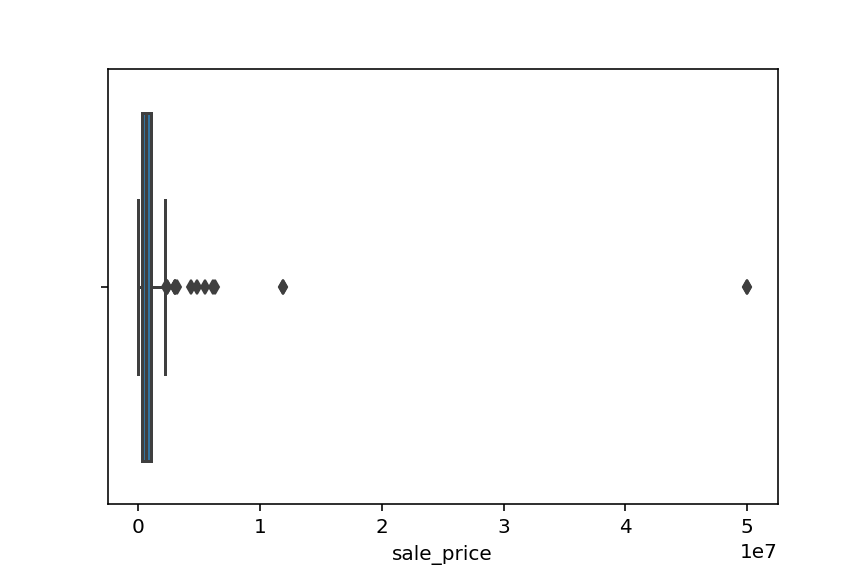

In [343]:
dashboard